In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot


In [196]:
df_train = pd.read_csv('house_pricing_train.csv')
df_train = df_train.set_index('Id')

In [197]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Segment - Identification of the variables' segment. We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood').

In [198]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

MOST RELEVANT FEATURES BASED ON COMMON SENSE:
- OveallQual (type INT)
- yearBuilt  (type INT)
- TotalBSmtSF (type INT)
- GrLivArea   (type INT)

#### Analyzing the target variable- SalePrice

In [199]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

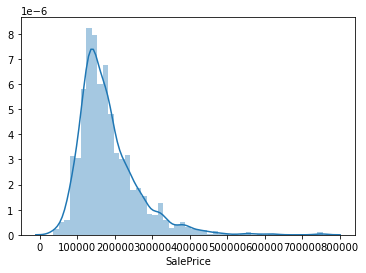

In [200]:
sns.distplot(df_train['SalePrice'])

Histogram plot shows that SalePrice is not normally distrubuted. It is positively skewed or right skewed. 

In [201]:
print(f"Skewness of SalePrice: {df_train['SalePrice'].skew()}")
print(f"Kurtosis of SalePrice : {df_train['SalePrice'].kurt()}")    

Skewness of SalePrice: 1.8828757597682129
Kurtosis of SalePrice : 6.536281860064529


#### Relationship with Numerical variables

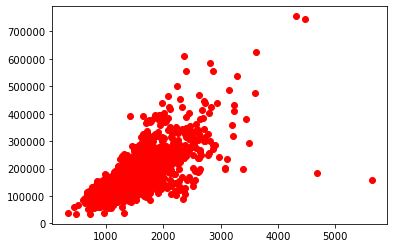

In [202]:
# scatter plot Grlivarea and SalePrice
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'], c= 'red')

there is a linear relationship between GrLivArea and SalePrice

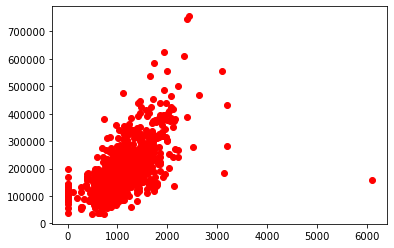

In [203]:
plt.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'], c= 'red')

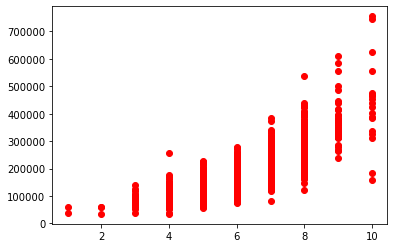

In [204]:
plt.scatter(df_train['OverallQual'], df_train['SalePrice'], c= 'red')

#### Relationship with the Categorical features

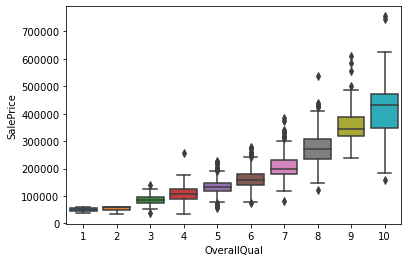

In [205]:
sns.boxplot(df_train['OverallQual'], df_train['SalePrice'])

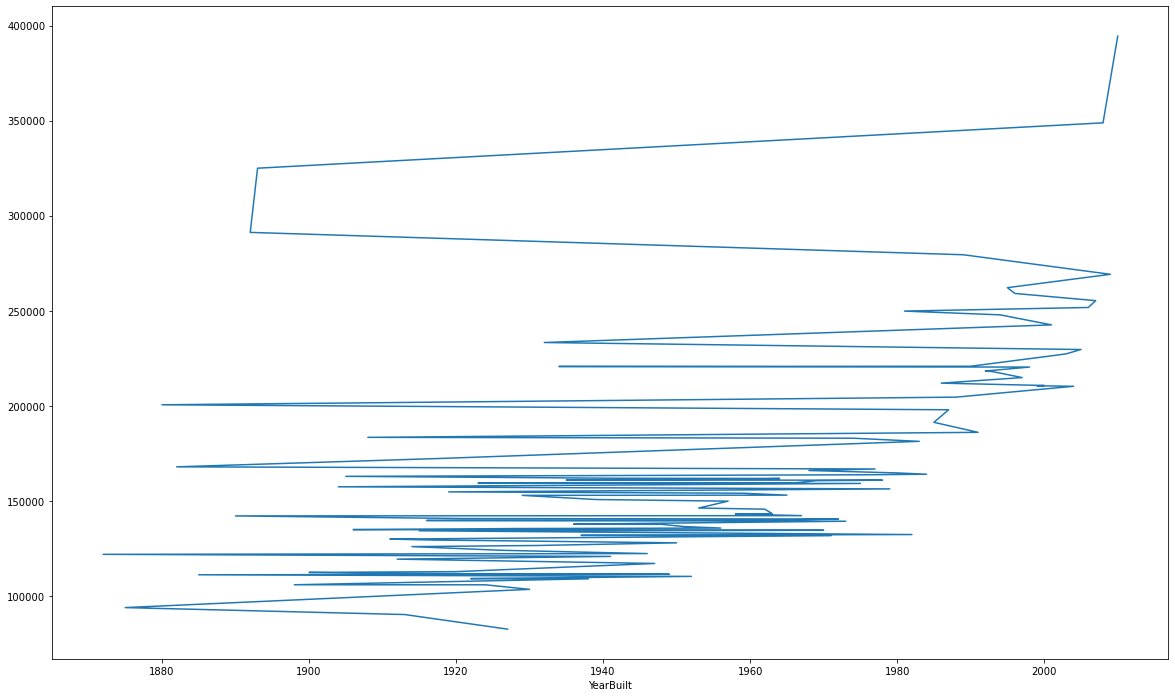

In [206]:
plt.figure(figsize=(20,12))
df_train.groupby('YearBuilt')['SalePrice'].mean().sort_values(ascending= False).plot()

In [207]:
df_train.groupby('YearBuilt')['SalePrice'].mean().sort_values(ascending= False)

YearBuilt
2010    394432.000000
2008    348849.130435
1893    325000.000000
1892    291250.000000
1989    279500.000000
            ...      
1924    105985.714286
1930    103588.888889
1875     94000.000000
1913     90350.000000
1927     82666.666667
Name: SalePrice, Length: 112, dtype: float64

We see that as the built year is relatively new, we get higher sale price for the building

In [208]:
df_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


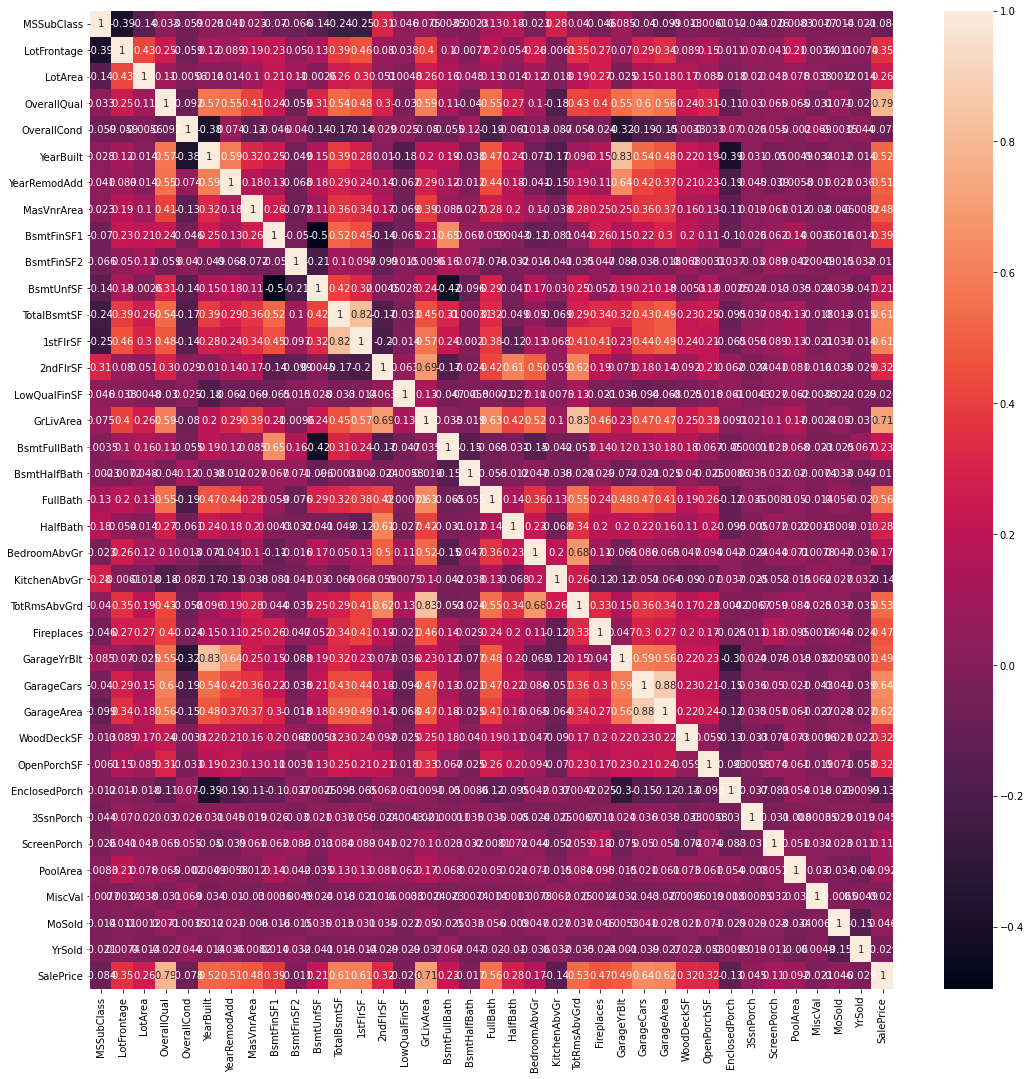

In [209]:
plt.figure(figsize=(18,18))
sns.heatmap(df_train.corr(), annot= True)

there are many instances of multicollinearity between the variables. 

In [210]:
cols = df_train.corr().nlargest(10, 'SalePrice')['SalePrice'].index

In [211]:
df_imp = df_train[cols]

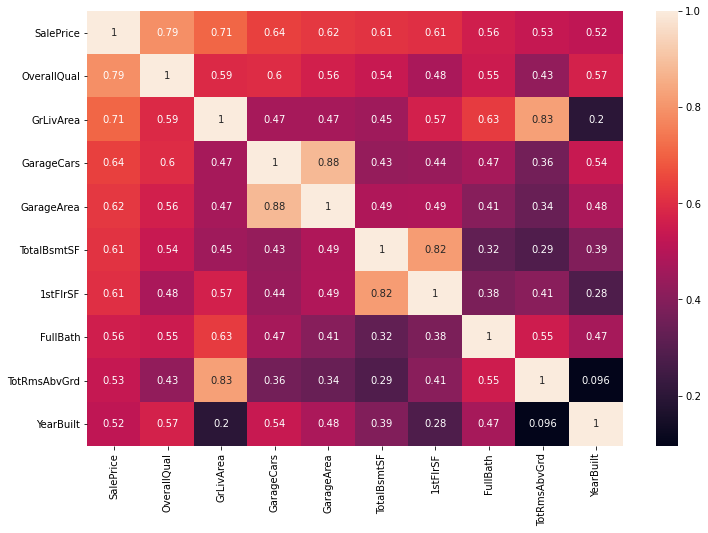

In [212]:
plt.figure(figsize= (12,8))
sns.heatmap(df_imp.corr(), annot = True)

Above 10 variables are most important and most correlated with the SalePrice feature. We need to analyse these.

#### test the assumptions of Linear Regression:
- Linearity
- Endogeneity
- Normality and Homoscedasticity
- Autocorrelation
- Multicollinearity

In [213]:
# checking multicollinearity
# we do this via VIF = 1/(1-Rsq)

from statsmodels.stats.outliers_influence import variance_inflation_factor
vari = df_imp.drop(columns = 'SalePrice', axis= 1).columns

In [214]:
len(vari)

9

In [215]:
vari.values

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype=object)

In [216]:
df_imp

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
Id,,,,,,,,,,
1,208500,7,1710,2,548,856,856,2,8,2003
2,181500,6,1262,2,460,1262,1262,2,6,1976
3,223500,7,1786,2,608,920,920,2,6,2001
4,140000,7,1717,3,642,756,961,1,7,1915
5,250000,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...,...
1456,175000,6,1647,2,460,953,953,2,7,1999
1457,210000,6,2073,2,500,1542,2073,2,7,1978
1458,266500,7,2340,1,252,1152,1188,2,9,1941


In [217]:
vif = pd.DataFrame()

In [218]:
for i in range(len(vari)):
    print(variance_inflation_factor(df_imp[vari.values].values, i),i)
# list(range(len(vari)))

48.155854028943324 0
45.13146164094213 1
33.58426951112884 2
29.069732181941454 3
23.825037034020447 4
36.69940485021879 5
17.236830693276982 6
56.36579739023631 7
37.183284495532114 8


In [219]:
vif['VIF'] = [variance_inflation_factor(df_imp[vari.values].values, i) for i in list(range(len(vari)))]
vif['Features'] = vari.columns

AttributeError: 'Index' object has no attribute 'columns'

In [220]:
variables = df_imp[['GarageArea', 'GarageCars']]
vif= pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [221]:
vif

,VIF,Features
0,26.370836,GarageArea
1,26.370836,GarageCars


we see GarageArea and GarageCars are having VIF > 10, which is unacceptable. So, we can ignore one of these. 
Lets take the variable GarageArea, since it is more correlated to the SalePrice (0.54)

In [222]:
variables = df_imp[['TotalBsmtSF', '1stFlrSF']]
vif= pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [223]:
vif

,VIF,Features
0,20.731561,TotalBsmtSF
1,20.731561,1stFlrSF


 We see TotalBsmtSF and 1stFlrSF are having VIF > 10, which is unacceptable. So, we can ignore one of these. Lets take TotalBsmtSF, since it is more correlated to the SalePrice (0.39)  

In [224]:
variables = df_imp[['1stFlrSF', 'GrLivArea']]
vif= pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,11.388191,1stFlrSF
1,11.388191,GrLivArea


In [225]:
variables = df_imp[['TotRmsAbvGrd', 'GrLivArea']]
vif= pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

vif

,VIF,Features
0,28.319495,TotRmsAbvGrd
1,28.319495,GrLivArea


Again, we find VIF > 10 for TotRmsAbvGrd and GrLivArea, so these are multicollinear. Hence, we ignore these and neglect one of them. Lets keep GrLivArea.

#### We are left with following variables after checking for the most important ones and the presence of multicollinearity

#### These are:
- OverallQaul: Overall material and finish quality
- YearBuilt: Original construction date
- TotalBsmtSF: Total square feet of basement area
- GrLivArea: Above grade (ground) living area square feet
- FullBath: Full bathrooms above grade
- GarageCars: Size of garage in car capacity

In [226]:
data = pd.read_csv('house_pricing_train.csv', 
                   usecols= ['OverallQual', 'YearBuilt', 
                             'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice'])

In [227]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,856,1710,2,2,208500
1,6,1976,1262,1262,2,2,181500
2,7,2001,920,1786,2,2,223500
3,7,1915,756,1717,1,3,140000
4,8,2000,1145,2198,2,3,250000


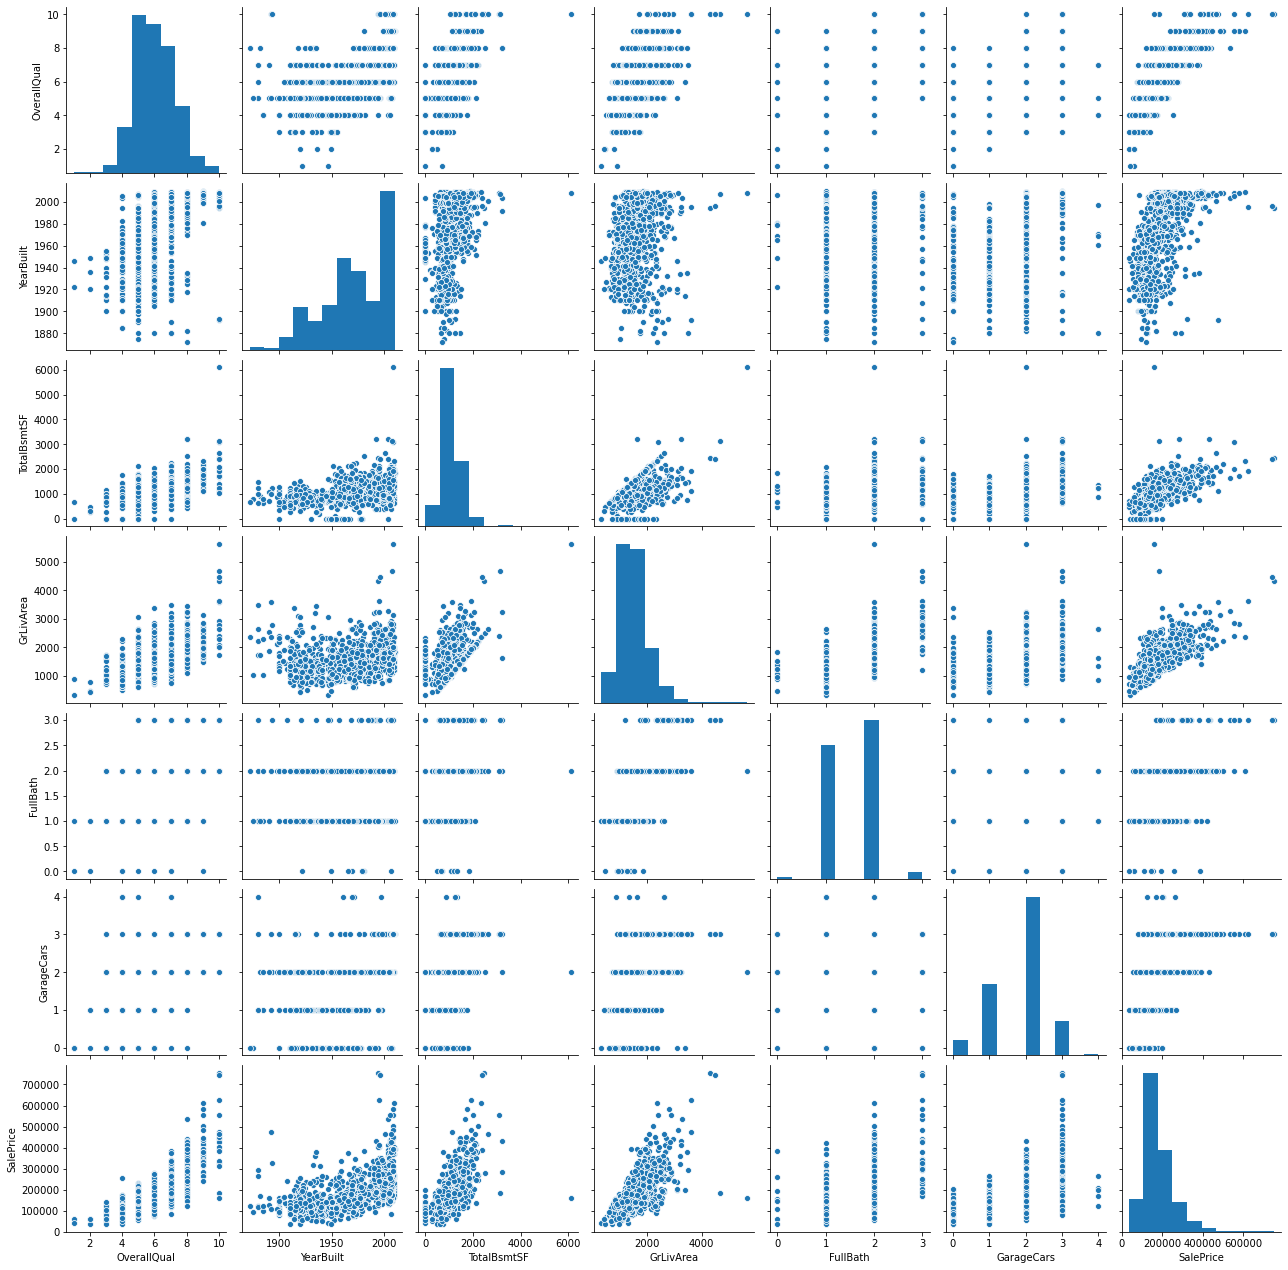

In [228]:
sns.pairplot(data)

So, Linear relationship exists between:
    - SalePrice vs YearBuilt
    - SalePrice vs TotalBsmtSF
    - SalePrice vs GrLivArea
    - TotalBmstSF vs GrLivArea

Histogram plots of :
    - OverallQual = Normal
    - YearBuilt = Left Skewed
    - TotalBsmtSF = Right Skewed
    - GrLivArea = Right Skewed
    - FullBath = Normal
    - GarageCars = Normal
    - SalePrice = Right Skewed


### Missing Data

In [229]:
data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,FullBath,GarageCars,SalePrice
0,7,2003,856,1710,2,2,208500
1,6,1976,1262,1262,2,2,181500
2,7,2001,920,1786,2,2,223500
3,7,1915,756,1717,1,3,140000
4,8,2000,1145,2198,2,3,250000


In [230]:
data.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
GrLivArea      0
FullBath       0
GarageCars     0
SalePrice      0
dtype: int64

In [231]:
missing_data = pd.concat([df_train.isnull().sum(), df_train.isnull().mean()*100], axis= 1, keys = ['Total', 'Percent'])

In [232]:
df_noMissing = df_train.drop((missing_data[missing_data['Percent'] > 15]).index,1)

In [233]:
df_noMissing.isnull().mean().head()

MSSubClass    0.0
MSZoning      0.0
LotArea       0.0
Street        0.0
LotShape      0.0
dtype: float64

In [234]:
# checking if the missing values are MCAR or MNAR or MAR ???

Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the datase

Missing at Random, MAR:
MAR occurs when there is a relationship between the propensity of missing values and the observed data. In other words, the probability of an observation being missing depends on available information (i.e., other variables in the dataset)

Missing Not at Random, MNAR:
Missing data is not at random (MNAR) when there is a mechanism or a reason why missing values are introduced in the dataset.

In [235]:
df_noMissing.shape

(1460, 74)

Now, we need to impute the missing values. Since these are numerical values and categorical values and some of the variables may be normal or not, so we impute the missing values with median of that numerical column while if it is a categorical, then we replace with the modal or most frequent category

In [236]:
df_noMissing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [237]:
df_imputed = df_noMissing.apply(lambda x: x.fillna(x.median()) if x.dtype == 'int' or x.dtype == 'float' else
                               x.fillna(x.value_counts().index[0]))

In [238]:
df_imputed.isnull().mean()

MSSubClass       0.0
MSZoning         0.0
LotArea          0.0
Street           0.0
LotShape         0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 74, dtype: float64

#### Outlier Detection

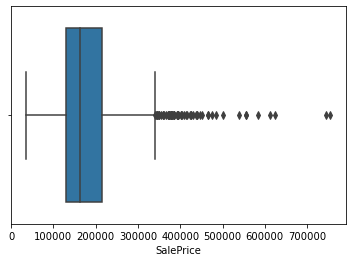

In [239]:
#boxplot of SalePrice
sns.boxplot(df_imputed['SalePrice'])

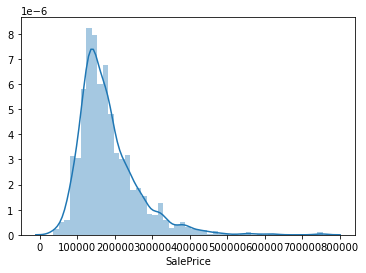

In [240]:
sns.distplot(df_imputed['SalePrice'])

In [265]:
#removing outliers

outliers_SalePrice = np.where(df_imputed['SalePrice'] > max_threshold, True,
                       np.where(df_imputed['SalePrice'] < min_threshold, True, False))

# df_remOut = df_imputed.loc[~outliers_SalePrice]

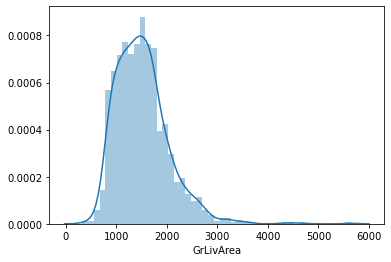

In [261]:
sns.distplot(df_imputed['GrLivArea'])

In [267]:
outliers_GrLivArea = np.where(df_imputed['GrLivArea'] > max_threshold, True,
                       np.where(df_imputed['GrLivArea'] < min_threshold, True, False))

##### plotting histograms to analyse distributions

Text(0.5, 1.0, 'GarageCars')

<Figure size 432x432 with 0 Axes>

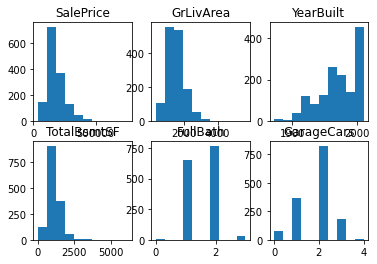

In [285]:
plt.figure(figsize= (6,6))
fig, axs = plt.subplots(2, 3)

axs[0, 0].hist(df_imputed['SalePrice'])
axs[0, 0].set_title('SalePrice')

axs[0, 1].hist(df_imputed['GrLivArea'])
axs[0, 1].set_title('GrLivArea')

axs[0, 2].hist(df_imputed['YearBuilt'])
axs[0, 2].set_title('YearBuilt')

axs[1, 0].hist(df_imputed['TotalBsmtSF'])
axs[1, 0].set_title('TotalBsmtSF')

axs[1, 1].hist(df_imputed['FullBath'])
axs[1, 1].set_title('FullBath')

axs[1, 2].hist(df_imputed['GarageCars'])
axs[1, 2].set_title('GarageCars')

##### removing outliers in all of them

In [287]:
# SalePrice
min_threshold = df_imputed['SalePrice'].quantile(0.05)
max_threshold = df_imputed['SalePrice'].quantile(0.95)

outliers_SalePrice = np.where(df_imputed['SalePrice'] > max_threshold, True,
                       np.where(df_imputed['SalePrice'] < min_threshold, True, False))


In [288]:
# #GrlivArea
# min_threshold = df_imputed['GrLivArea'].quantile(0.05)
# max_threshold = df_imputed['GrLivArea'].quantile(0.95)

# outliers_GrLivArea = np.where(df_imputed['GrLivArea'] > max_threshold, True,
#                        np.where(df_imputed['GrLivArea'] < min_threshold, True, False))

In [289]:
# # YearBuilt
# min_threshold = df_imputed['YearBuilt'].quantile(0.05)
# max_threshold = df_imputed['YearBuilt'].quantile(0.95)

# outliers_YearBuilt = np.where(df_imputed['GrLivArea'] > max_threshold, True,
#                        np.where(df_imputed['GrLivArea'] < min_threshold, True, False))

In [290]:
# #TotalBmstSF
# min_threshold = df_imputed['TotalBsmtSF'].quantile(0.05)
# max_threshold = df_imputed['TotalBsmtSF'].quantile(0.95)

# outliers_TotalBmstSF = np.where(df_imputed['TotalBsmtSF'] > max_threshold, True,
#                        np.where(df_imputed['TotalBsmtSF'] < min_threshold, True, False))

In [291]:
# #FullBath
# Q1, Q3 = np.percentile(df_imputed['FullBath'], [25,75])

# outliers_FullBath = np.where(df_imputed['FullBath'] > (Q3 + 1.5* (Q3-Q1)), True,
#                        np.where(df_imputed['FullBath'] < (Q1 - 1.5* (Q3-Q1)), True, False))

In [292]:
# #GarageCars
# Q1, Q3 = np.percentile(df_imputed['GarageCars'], [25,75])

# outliers_GarageCars = np.where(df_imputed['GarageCars'] > (Q3 + 1.5* (Q3-Q1)), True,
#                        np.where(df_imputed['GarageCars'] < (Q1 - 1.5* (Q3-Q1)), True, False))

In [293]:
# df_remOut = df_imputed.loc[~(outliers_FullBath + outliers_GarageCars + outliers_GrLivArea + outliers_SalePrice 
#                             + outliers_TotalBmstSF + outliers_YearBuilt)]

In [300]:
df_remOut = df_imputed.loc[~outliers_SalePrice]

In [301]:
df_remOut.shape, df_imputed.shape

((1316, 74), (1460, 74))

##### test the assumptions of Linear Regression:
- Linearity
- Enogeneity
- Normality and Homoscedasticity
- Autocorrelation
- |Multicollinearity

In [295]:
#cheking normality

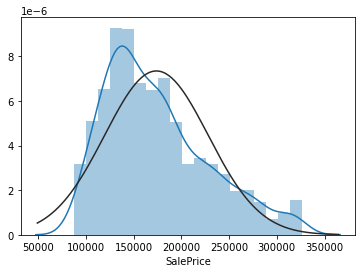

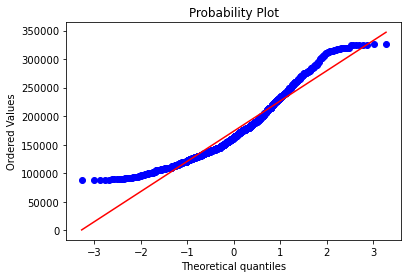

In [302]:
sns.distplot(df_remOut['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_remOut['SalePrice'], plot=plt)

So, SalePrice is not normal. to make it we need to apply some transformation. Eg. Log transformation

In [303]:
df_final = df_remOut.copy()

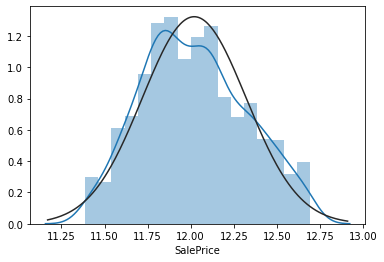

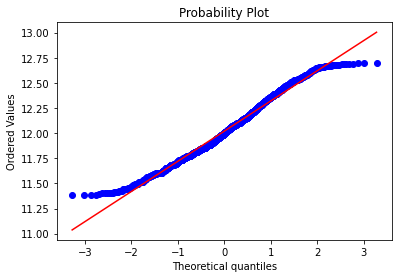

In [304]:
df_final['SalePrice'] = np.log(df_final['SalePrice'])

sns.distplot(df_final['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_final['SalePrice'], plot = plt)

Now its Normal.

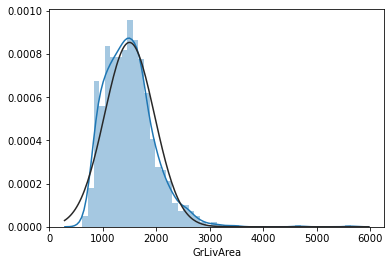

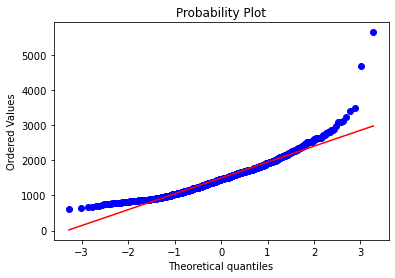

In [306]:
# check for GrLivArea
sns.distplot(df_final['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_final['GrLivArea'], plot=plt)


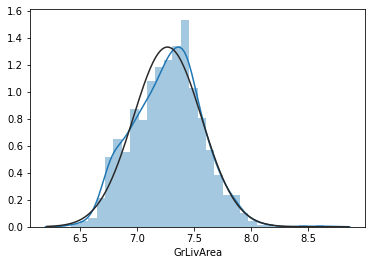

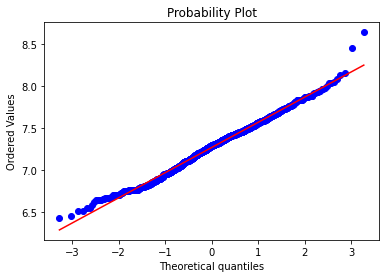

In [307]:
df_final['GrLivArea'] = np.log(df_final['GrLivArea'])

sns.distplot(df_final['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_final['GrLivArea'], plot=plt)

its Normal now.

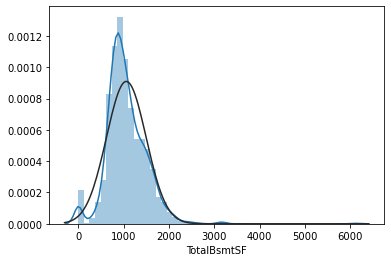

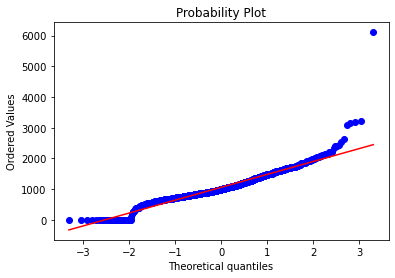

In [308]:
# check for TotalBmstSF

sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

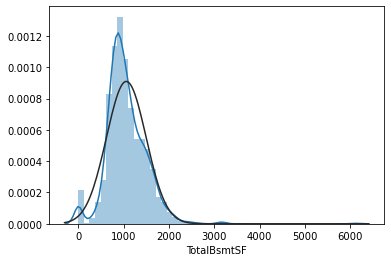

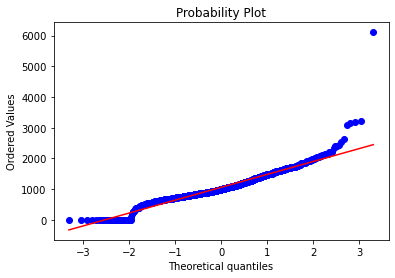

In [309]:
#applying transformation

df_final['TotalBsmtSF'] = np.log(df_final['TotalBsmtSF'])

sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

But still it does not look like normal. The problem is that there are many properties with 0 as the value in the TotalBmstSF column. We need to address that

In [313]:
#making a binary column:

df_final['HasBsmt'] = pd.Series(len(df_final['TotalBsmtSF']), index=df_final.index)
df_final['HasBsmt'] = 0 
df_final.loc[df_final['TotalBsmtSF']>0,'HasBsmt'] = 1

In [314]:
df_final.loc[df_final['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_final['TotalBsmtSF'])

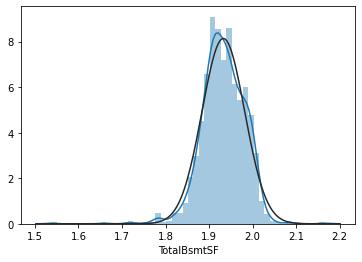

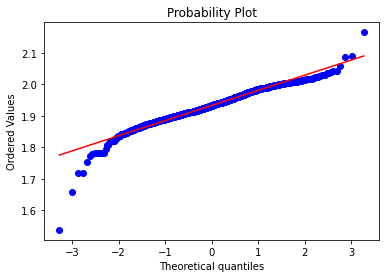

In [315]:
#histogram and normal probability plot
sns.distplot(df_final[df_final['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_final[df_final['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

###### check for heteroscedasticity

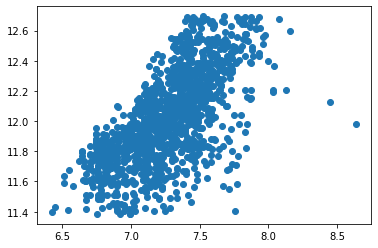

In [316]:
#scatter plot:
plt.scatter(df_final['GrLivArea'], df_final['SalePrice'])

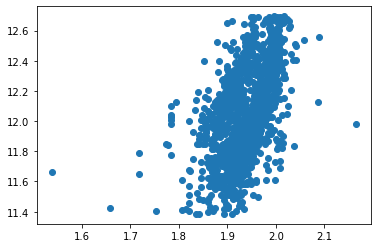

In [319]:
##scatter plot
plt.scatter(df_final[df_final['TotalBsmtSF']>0]['TotalBsmtSF'], df_final[df_final['TotalBsmtSF']>0]['SalePrice']);

In [323]:
df_final.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc